# Import

Example of journalling along with the codebase.

In [333]:
import tensorflow as tf
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib import colors

from mpl_toolkits.mplot3d import Axes3D

#import plot_boundary_on_data
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)

# Data Structures

## TF Constants

In [3]:
a = tf.constant([2])
b = tf.constant([3])

In [4]:
c = tf.add(a,b)

In [5]:
sess = tf.Session()

In [7]:
result = sess.run(c)
sess.close()

In [8]:
with tf.Session() as sess : 
    result = sess.run(c)
    print result

[5]


In [11]:
#tf.device

In [12]:
Scalar = tf.constant([2])
Vector = tf.constant([5,6,2])
Matrix = tf.constant([[5,4],[3,2]])
Tensor4 = tf.constant([[[5,4],[4,1]],[[2,4],[5,8]]])

In [14]:
with tf.Session() as sess:
    result = sess.run(Scalar)
    print "Scalar :%s"% result
    result = sess.run(Vector)
    print "Vector :%s"% result
    result = sess.run(Matrix)
    print "Matrix :%s"% result
    result = sess.run(Tensor4)
    print "Tensor4 :%s"% result

Scalar :[2]
Vector :[5 6 2]
Matrix :[[5 4]
 [3 2]]
Tensor4 :[[[5 4]
  [4 1]]

 [[2 4]
  [5 8]]]


In [15]:
Matrix1 =  tf.constant([[5,4],[3,2]])
Matrix2 =  tf.constant([[2,3],[6,2]])
first_operation = tf.matmul(Matrix1, Matrix2)


In [16]:
with tf.Session() as sess:
    result = sess.run(first_operation)
    print "Matrix Mult Output:%s"% result


Scalar :[[34 23]
 [18 13]]


## TF Variables

In [17]:
state = tf.Variable(0)

In [18]:
one = tf.constant(1)
new_value = tf.add(state, one)
update = tf.assign(state,new_value)

In [21]:
init_op = tf.global_variables_initializer()

In [23]:
with tf.Session() as sess:
    result = sess.run(init_op)
    print (sess.run(state))
    for i in range(3):
        result = sess.run(update)
        print "Output:%s"% result


0
Output:1
Output:2
Output:3


## TF Placeholders

In [24]:
a = tf.placeholder(tf.float16)
b = a**2

In [27]:
with tf.Session() as sess:
    result = sess.run(b, feed_dict={a:[[5,4],[3,2]]})
    print result


[[ 25.  16.]
 [  9.   4.]]


# Data Prep

## Common Functions

In [198]:
def extract_data(filename):

    # Arrays to hold the labels and feature vectors.
    labels = []
    fvecs = []

    # Iterate over the rows, splitting the label from the features. Convert labels
    # to integers and features to floats.
    for line in file(filename):
        row = line.split(",")
        labels.append(int(row[0]))
        fvecs.append([float(x) for x in row[1:]])

    # Convert the array of float arrays into a numpy float matrix.
    fvecs_np = np.matrix(fvecs).astype(np.float32)

    # Convert the array of int labels into a numpy array.
    labels_np = np.array(labels).astype(dtype=np.uint8)

    # Convert the int numpy array into a one-hot matrix.
    labels_onehot = (np.arange(NUM_LABELS) == labels_np[:, None]).astype(np.float32)

    # Return a pair of the feature matrix and the one-hot label matrix.
    return fvecs_np,labels_onehot


## SimpleLinear Regression without TF

In [131]:
X = np.arange(0.0, 5.0, 0.1)
X

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9])

## Linear Regression with TF

In [127]:
x_data = np.random.rand(100).astype(np.float32)

In [128]:
y_data = x_data *3 + 2
# Adding Gaussian Noise
y_data = np.vectorize(lambda y: y + np.random.normal(loc=0.0, scale=0.1))(y_data)

In [129]:
zip(x_data,y_data)[:5]

[(0.80939198, 4.5293448422522147),
 (0.34933555, 3.1387545293662877),
 (0.07324779, 2.2973447854112363),
 (0.2603341, 2.7705754144065518),
 (0.61382812, 3.8655933549448998)]

## Logistic Regression with TF

In [288]:
train_data,train_labels = extract_data('simdata/linear_data_train.csv')
test_data, test_labels = extract_data('simdata/linear_data_eval.csv')

# Get the shape of the training data.
train_size,num_features = train_data.shape

# Get the number of epochs for training.
num_epochs = 2
train_labels

array([[ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       ..., 
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.]], dtype=float32)

## Simple Neural Network

In [296]:
train_data,train_labels = extract_data('simdata/moon_data_train.csv')
test_data, test_labels = extract_data('simdata/moon_data_eval.csv')

# Get the shape of the training data.
train_size,num_features = train_data.shape

# Get the number of epochs for training.
num_epochs = 2

train_labels

array([[ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       ..., 
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.]], dtype=float32)

# Visualization Functions

## Common Functions

In [243]:
def plot_func(X,Y,pred_func):
    # determine canvas borders
    mins = np.amin(X,0); 
    mins = mins - 0.5*np.abs(mins);
    maxs = np.amax(X,0); 
    maxs = maxs + 0.5*maxs;

    ## generate dense grid
    xs,ys = np.meshgrid(np.linspace(mins[0,0],maxs[0,0],300), 
            np.linspace(mins[0,1], maxs[0,1], 300));


    # evaluate model on the dense grid
    Z = pred_func(np.c_[xs.flatten(), ys.flatten()]);
    Z = Z.reshape(xs.shape)

    # Plot the contour and training examples
    plt.contourf(xs, ys, Z, cmap=plt.cm.Spectral)
    plt.scatter([X[:, 0]], [X[:, 1]], c=Y[:,1], s=50,
            cmap=colors.ListedColormap(['orange', 'blue']))
    plt.show()


## Logistic Regression with TF

# Activation Functions

In [336]:
def plot_act(i=1.0, actfunc=lambda x:x):
    ws = np.arange(-0.5,0.5,0.05)
    bs = np.arange(-0.5,0.5,0.05)
    
    X,Y = np.meshgrid(ws,bs)
    
    os = np.array([actfunc(tf.constant(w*i+b)).eval(session=sess) \
                   for w,b in zip(np.ravel(X), np.ravel(Y)) \
                  ])
    Z = os.reshape(X.shape)
    
    fig = plt.figure()
    ax = fig.add_subplot(111,projection='3d')
    ax.plot_surface(X,Y,Z,rstride =1, cstride=1)

In [338]:
sess = tf.Session()

i = tf.constant([1.0,2,3], shape=[1,3])

w = tf.random_normal(shape=[3,3])
b = tf.random_normal(shape=[1,3])

def func(x): return x
act = func(tf.matmul(i,w)+b)
act.eval(session=sess)

array([[-0.70860267, -0.27064419,  3.39315939]], dtype=float32)

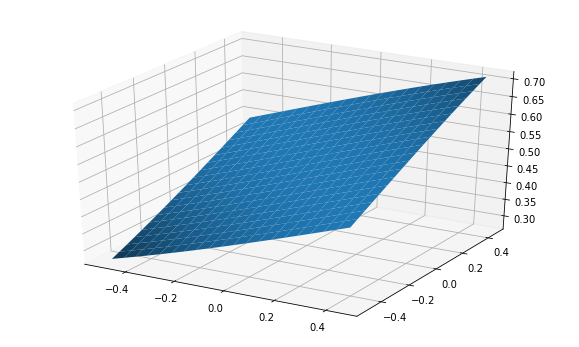

In [341]:
plot_act(1.0, tf.sigmoid)

In [342]:
act = tf.sigmoid(tf.matmul(i,w)+b)
act.eval(session=sess)

array([[ 0.95222533,  0.99954408,  0.99508888]], dtype=float32)

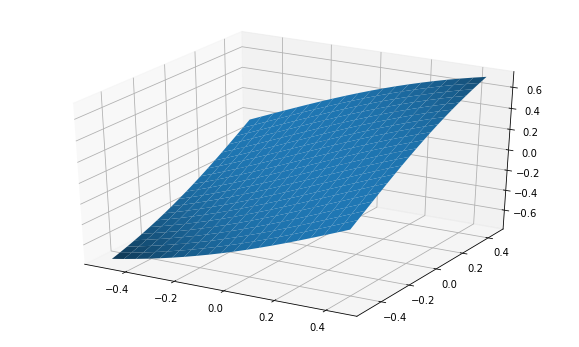

In [343]:
plot_act(1.0, tf.tanh)

In [344]:
act = tf.tanh(tf.matmul(i,w)+b)
act.eval(session=sess)

array([[-0.99996918,  0.95241052, -0.43821189]], dtype=float32)

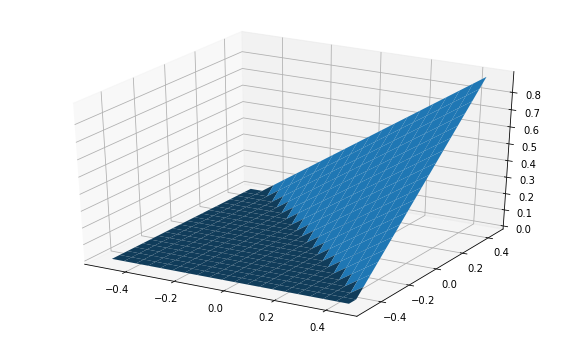

In [346]:
plot_act(1.0, tf.nn.relu)

In [347]:
act = tf.nn.relu(tf.matmul(i,w)+b)
act.eval(session=sess)

array([[ 0.        ,  0.49137545,  0.        ]], dtype=float32)

# Model Creation

## SimpleLinear Regression without TF

In [130]:
X = np.arange(0.0, 5.0, 0.1)
X

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9])

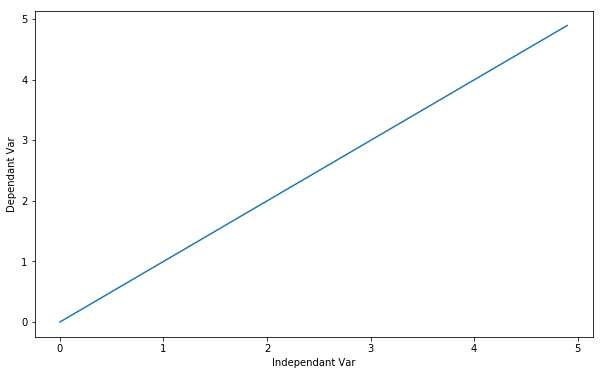

In [35]:
a =1; b = 0 
Y = a*X + b 

plt.plot(X,Y)
plt.ylabel('Dependant Var')
plt.xlabel('Independant Var')
plt.show()

## Linear Regression with TF

In [134]:
# Initialization
a = tf.Variable(1.0)
b = tf.Variable(0.2)
y = a * x_data + b

In [135]:
loss = tf.reduce_mean(tf.square(y - y_data))

Once you define the variables a and b, y is dependant on x_data input and Variables a and b. 
Graph of y is created. 
The variables a,b are optimized using Gradient Descent Optimizer using the train goal.
The train works the optimizer to minimize the loss mean of all ((y -y_data)^2)

In [136]:
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

<tf.Variable 'Variable_15:0' shape=() dtype=float32_ref>

In [77]:
train_data = []
for step in range(100):
    evals = sess.run([train, a, b])[1:]
    if step%5 == 0:
        print(step, evals)
        train_data.append(evals)

(0, [2.5918064, 3.0047252])
(5, [2.4913688, 2.2736306])
(10, [2.6494529, 2.18922])
(15, [2.758184, 2.1303542])
(20, [2.8332033, 2.0897405])
(25, [2.884963, 2.0617192])
(30, [2.9206743, 2.0423861])
(35, [2.9453135, 2.029047])
(40, [2.9623132, 2.0198438])
(45, [2.9740422, 2.013494])
(50, [2.9821346, 2.0091131])
(55, [2.9877179, 2.0060904])
(60, [2.99157, 2.004005])
(65, [2.9942281, 2.0025659])
(70, [2.996062, 2.0015731])
(75, [2.9973271, 2.0008881])
(80, [2.9982002, 2.0004156])
(85, [2.9988024, 2.0000894])
(90, [2.999218, 1.9998646])
(95, [2.9995046, 1.9997094])


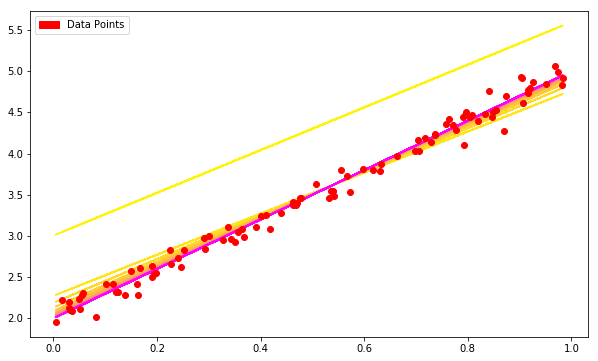

In [79]:
converter = plt.colors
cr, cg, cb = (1,1,0)
for f in train_data:
    cb += 1.0/len(train_data)
    cg -= 1.0/len(train_data)
    if cb > 1: cb=1
    if cg < 0: cg=0
    [a,b] = f
    f_y  = np.vectorize(lambda x: a*x+ b)(x_data)
    line = plt.plot(x_data,f_y)
    plt.setp(line,color=(cr,cg,cb))

plt.plot(x_data,y_data,'ro')
green_line = mpatches.Patch(color='red', label='Data Points')
plt.legend(handles=[green_line])
plt.show()

## Logistic Regression

Sigmoid -> Theta(y)  = e^y/(1+e^y)
3 Function Set:
1) Weight Matrix Multiplication
2) Bias Addition
3) Fitting to Sigmoid Probablistic Curve

Weight and Bias are tuned during Training process.




In [289]:
# This is where training samples and labels are fed to the graph.
# These placeholder nodes will be fed a batch of training data at each
# training step using the {feed_dict} argument to the Run() call below.
x = tf.placeholder("float", shape=[None, num_features])
y_ = tf.placeholder("float", shape=[None, NUM_LABELS])


In [290]:
x

<tf.Tensor 'Placeholder_15:0' shape=(?, 2) dtype=float32>

In [291]:
# These are the weights that inform how much each feature contributes to
# the classification.
W = tf.Variable(tf.ones([num_features,NUM_LABELS]))
b = tf.Variable(tf.zeros([NUM_LABELS]))
y = tf.nn.softmax(tf.matmul(x,W) + b)


In [292]:
# Optimization.
cross_entropy = -tf.reduce_sum(y_*tf.log(y))
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)


## Simple Neural Network

In [325]:
# Init weights method. (Lifted from Delip Rao: http://deliprao.com/archives/100)
def init_weights(shape, init_method='xavier', xavier_params = (None, None)):
    if init_method == 'zeros':
        return tf.Variable(tf.zeros(shape, dtype=tf.float32))
    elif init_method == 'uniform':
        return tf.Variable(tf.random_normal(shape, stddev=0.01, dtype=tf.float32))
    else: #xavier
        (fan_in, fan_out) = xavier_params
        low = -4*np.sqrt(6.0/(fan_in + fan_out)) # {sigmoid:4, tanh:1} 
        high = 4*np.sqrt(6.0/(fan_in + fan_out))
        return tf.Variable(tf.random_uniform(shape, minval=low, maxval=high, dtype=tf.float32))

In [326]:
num_hidden = 3

In [327]:
# This is where training samples and labels are fed to the graph.
# These placeholder nodes will be fed a batch of training data at each
# training step using the {feed_dict} argument to the Run() call below.
x = tf.placeholder("float", shape=[None, num_features])
y_ = tf.placeholder("float", shape=[None, NUM_LABELS])

In [328]:
w_hidden = init_weights(
    [num_features, num_hidden],
    'xavier',
    xavier_params=(num_features, num_hidden))

b_hidden = init_weights([1,num_hidden],'zeros')

# The hidden layer.
hidden = tf.nn.tanh(tf.matmul(x,w_hidden) + b_hidden)

# Initialize the output weights and biases.
w_out = init_weights(
    [num_hidden, NUM_LABELS],
    'xavier',
    xavier_params=(num_hidden, NUM_LABELS))
    
b_out = init_weights([1,NUM_LABELS],'zeros')

# The output layer.
y = tf.nn.softmax(tf.matmul(hidden, w_out) + b_out)


In [329]:
# Optimization.
cross_entropy = -tf.reduce_sum(y_*tf.log(y))
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)


# Evaluation Criteria 

## Logistic Regression

In [293]:
# For the test data, hold the entire dataset in one constant node.
test_data_node = tf.constant(test_data)

# Evaluation.
predicted_class = tf.argmax(y,1);
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))


## Simple Neural N/W

In [330]:
# For the test data, hold the entire dataset in one constant node.
test_data_node = tf.constant(test_data)
# Evaluation.
predicted_class = tf.argmax(y,1);
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

# Training/Fit

## Linear Regression with TF

In [138]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
a

<tf.Variable 'Variable_15:0' shape=() dtype=float32_ref>

In [139]:
train_data = []
for step in range(100):
    evals = sess.run([train, a, b])[1:]
    if step%5 == 0:
        print(step, evals)
        train_data.append(evals)

(0, [2.6687064, 3.0661333])
(5, [2.4772456, 2.2973902])
(10, [2.6151178, 2.2219388])
(15, [2.7176843, 2.1642616])
(20, [2.7944827, 2.1210783])
(25, [2.8519857, 2.0887446])
(30, [2.8950412, 2.0645349])
(35, [2.927279, 2.0464079])
(40, [2.951417, 2.0328352])
(45, [2.9694905, 2.0226727])
(50, [2.9830229, 2.0150633])
(55, [2.9931552, 2.009366])
(60, [3.000742, 2.0051003])
(65, [3.0064225, 2.0019059])
(70, [3.0106757, 1.9995143])
(75, [3.0138605, 1.9977236])
(80, [3.0162449, 1.996383])
(85, [3.0180306, 1.9953789])
(90, [3.0193672, 1.9946272])
(95, [3.0203681, 1.9940645])


## Logistic Regression

[[ 0.27270249  0.02019367]
 [ 0.86785507  0.59782988]
 [ 0.68625259  0.42568311]
 [ 0.18614551  0.04127169]
 [ 0.64533895  0.58030164]
 [ 0.67437565  0.42787176]
 [ 0.69987994  0.40480772]
 [ 0.80284154  0.41609919]
 [ 0.58552063  0.61473447]
 [ 0.15936269  0.04387918]
 [ 0.81906092  0.53745949]
 [ 0.87894034  0.4982591 ]
 [ 0.71779507  0.47446188]
 [ 0.56603366  0.38739634]
 [ 0.24742973  0.08799957]
 [ 0.43124965  0.50812119]
 [ 0.44558772  0.49508712]
 [ 0.76039171  0.44456109]
 [ 0.76051062  0.5155251 ]
 [ 0.27549481  0.14047872]
 [ 0.75396883  0.52416277]
 [ 0.29449773 -0.0503884 ]
 [ 0.80471796  0.39851522]
 [ 0.30041805  0.35102713]
 [ 0.68836057  0.37352672]
 [ 0.85234541  0.40630394]
 [ 0.66809988  0.53184134]
 [ 0.30480075  0.15038992]
 [ 0.61936748  0.48021686]
 [ 0.68670309  0.36197934]
 [ 0.71858984  0.41621256]
 [ 0.82608515  0.57528692]
 [ 0.42044842 -0.0546403 ]
 [ 0.75141531  0.32502171]
 [ 0.73059243  0.54105914]
 [ 0.81390482  0.49523562]
 [ 0.33909062  0.03099914]
 

softmax(Wx+b) =  [[ 0.64299661  0.35700342]]

[-0.27395445]
[-11.44689274]
Accuracy: 1.0


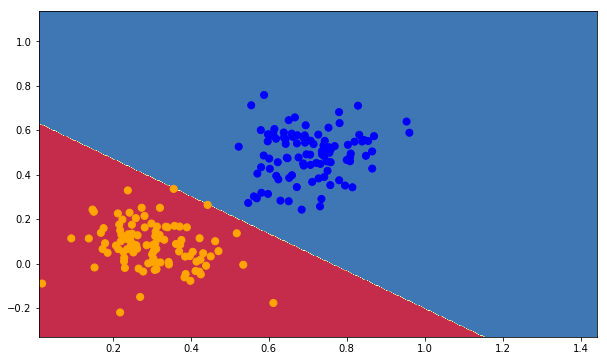

In [295]:
BATCH_SIZE = 200
verbose = 1
# Get the number of epochs for training.
num_epochs = 2
plot = 1 

with tf.Session() as s:

    # Run all the initializers to prepare the trainable parameters.
    tf.global_variables_initializer().run()
        
    # Iterate and train.
    for step in xrange(num_epochs * train_size // BATCH_SIZE):
    
        offset = (step * BATCH_SIZE) % train_size

        # get a batch of data
        batch_data = train_data[offset:(offset + BATCH_SIZE), :]
        print batch_data
        batch_labels = train_labels[offset:(offset + BATCH_SIZE)]
        print batch_labels
        # feed data into the model
        train_step.run(feed_dict={x: batch_data, y_: batch_labels})

        # Give very detailed output.
    if verbose:
        print
        print 'Weight matrix.'
        print s.run(W)
        print
        print 'Bias vector.'
        print s.run(b)
        print
        print "Applying model to first test instance."
        first = test_data[5]
        print "Point =", first
        print "Wx+b = ", s.run(tf.matmul(first,W)+b)
        print "softmax(Wx+b) = ", s.run(tf.nn.softmax(tf.matmul(first,W)+b))
        print
        print s.run([W[1][0]])
        print s.run(b)[0]/s.run([W[0][0]])
            
    print "Accuracy:", accuracy.eval(feed_dict={x: test_data, y_: test_labels})
    if plot:
        eval_fun = lambda X: predicted_class.eval(feed_dict={x:X}); 
        plot_func(test_data, test_labels, eval_fun)



Consider first the weights and bias. Intuitively, the classifier should find a separating hyperplane between the two classes, and it probably isn’t immediately obvious how W and b define that. For now, consider only the first column with w1=-1.87038457, w2=-2.23716712 and b=1.57296848. Recall that w1 is the parameter for the `x` dimension and w2 is for the `y` dimension. The separating hyperplane satisfies Wx+b=0; from which we get the standard y=mx+b form.

Wx + b = 0
w1*x + w2*y + b = 0
w2*y = -w1*x – b
y = (-w1/w2)*x – b/w2

For the parameters learned above, we have the line:

y = -0.8360504*x + 0.7031074

Here’s the plot with the line, showing it is an excellent fit for the training data.



## Simple Neural Network

Initialized!

Training.
0 1 2 3 4 5 6 7 8 9
10 11 12 13 14 15 16 17 18 19
20 21 22 23 24 25 26 27 28 29
30 31 32 33 34 35 36 37 38 39
40 41 42 43 44 45 46 47 48 49
50 51 52 53 54 55 56 57 58 59
60 61 62 63 64 65 66 67 68 69
70 71 72 73 74 75 76 77 78 79
80 81 82 83 84 85 86 87 88 89
90 91 92 93 94 95 96 97 98 99
100 101 102 103 104 105 106 107 108 109
110 111 112 113 114 115 116 117 118 119
120 121 122 123 124 125 126 127 128 129
130 131 132 133 134 135 136 137 138 139
140 141 142 143 144 145 146 147 148 149
150 151 152 153 154 155 156 157 158 159
160 161 162 163 164 165 166 167 168 169
170 171 172 173 174 175 176 177 178 179
180 181 182 183 184 185 186 187 188 189
190 191 192 193 194 195 196 197 198 199
200 201 202 203 204 205 206 207 208 209
210 211 212 213 214 215 216 217 218 219
220 221 222 223 224 225 226 227 228 229
230 231 232 233 234 235 236 237 238 239
240 241 242 243 244 245 246 247 248 249
250 251 252 253 254 255 256 257 258 259
260 261 262 263 264 265 266 267 268 269
270 27

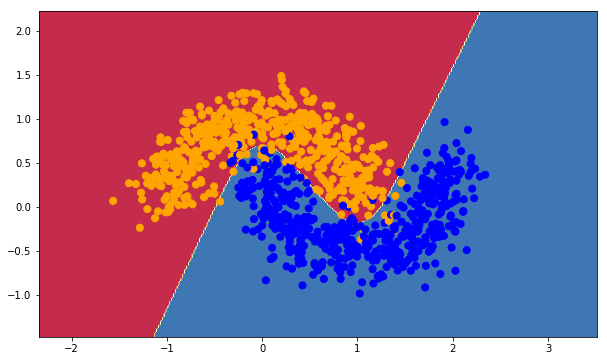

In [331]:
BATCH_SIZE = 200
verbose = 1
# Get the number of epochs for training.
num_epochs = 100
plot = 1 

with tf.Session() as s:
    # Run all the initializers to prepare the trainable parameters.
    tf.global_variables_initializer().run()
    if verbose:
        print 'Initialized!'
        print
        print 'Training.'
            
    # Iterate and train.
    for step in xrange(num_epochs * train_size // BATCH_SIZE):
        if verbose:
            print step,
                
        offset = (step * BATCH_SIZE) % train_size
        batch_data = train_data[offset:(offset + BATCH_SIZE), :]
        batch_labels = train_labels[offset:(offset + BATCH_SIZE)]
        train_step.run(feed_dict={x: batch_data, y_: batch_labels})
        if verbose and offset >= train_size-BATCH_SIZE:
            print
    print "Accuracy:", accuracy.eval(feed_dict={x: test_data, y_: test_labels})

    if plot:
        eval_fun = lambda X: predicted_class.eval(feed_dict={x:X}); 
        plot_func(test_data, test_labels, eval_fun)


# Visualization

## Linear Regression with TF

In [ ]:
converter = plt.colors
cr, cg, cb = (1,1,0)
for f in train_data:
    cb += 1.0/len(train_data)
    cg -= 1.0/len(train_data)
    if cb > 1: cb=1
    if cg < 0: cg=0
    [a,b] = f
    f_y  = np.vectorize(lambda x: a*x+ b)(x_data)
    line = plt.plot(x_data,f_y)
    plt.setp(line,color=(cr,cg,cb))

plt.plot(x_data,y_data,'ro')
green_line = mpatches.Patch(color='red', label='Data Points')
plt.legend(handles=[green_line])
plt.show()